In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
# importing X_train, X_test, y_train, y_test from previous notebook
import pandas as pd
train_data = pd.read_csv("../data/processed/train_admissions.csv")
test_data = pd.read_csv("../data/processed/test_admissions.csv")


X_train = train_data.drop('ReAdmis_Yes', axis=1)
y_train = train_data['ReAdmis_Yes']
X_test = test_data.drop('ReAdmis_Yes', axis=1)
y_test = test_data['ReAdmis_Yes']

In [3]:
# parameters for gridsearchCV
params = {
    'n_estimators': [10,20,30],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
rf = RandomForestClassifier(random_state=10)
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
best_rf = grid_search.best_estimator_
print("Best Random Forest Classifier: ", best_rf)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 30}
Best Random Forest Classifier:  RandomForestClassifier(min_samples_split=10, n_estimators=30, random_state=10)


In [4]:
rf_bestparams = RandomForestClassifier(max_depth=None, min_samples_leaf=1,min_samples_split=10,
                                       n_estimators=30, random_state=10)

rf_bestparams.fit(X_train, y_train)
y_pred = rf_bestparams.predict(X_test)

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
accuracy = (y_pred == test_data['ReAdmis_Yes']).mean()
print(f"Accuracy of the Random Forest Classifier on test set: {accuracy:.4f}")

mse = mean_squared_error(test_data['ReAdmis_Yes'], y_pred)
print(f"Mean Squared Error of the Random Forest Classifier on test set: {mse:.4f}")




Accuracy of the Random Forest Classifier on test set: 0.9805
Mean Squared Error of the Random Forest Classifier on test set: 0.0195


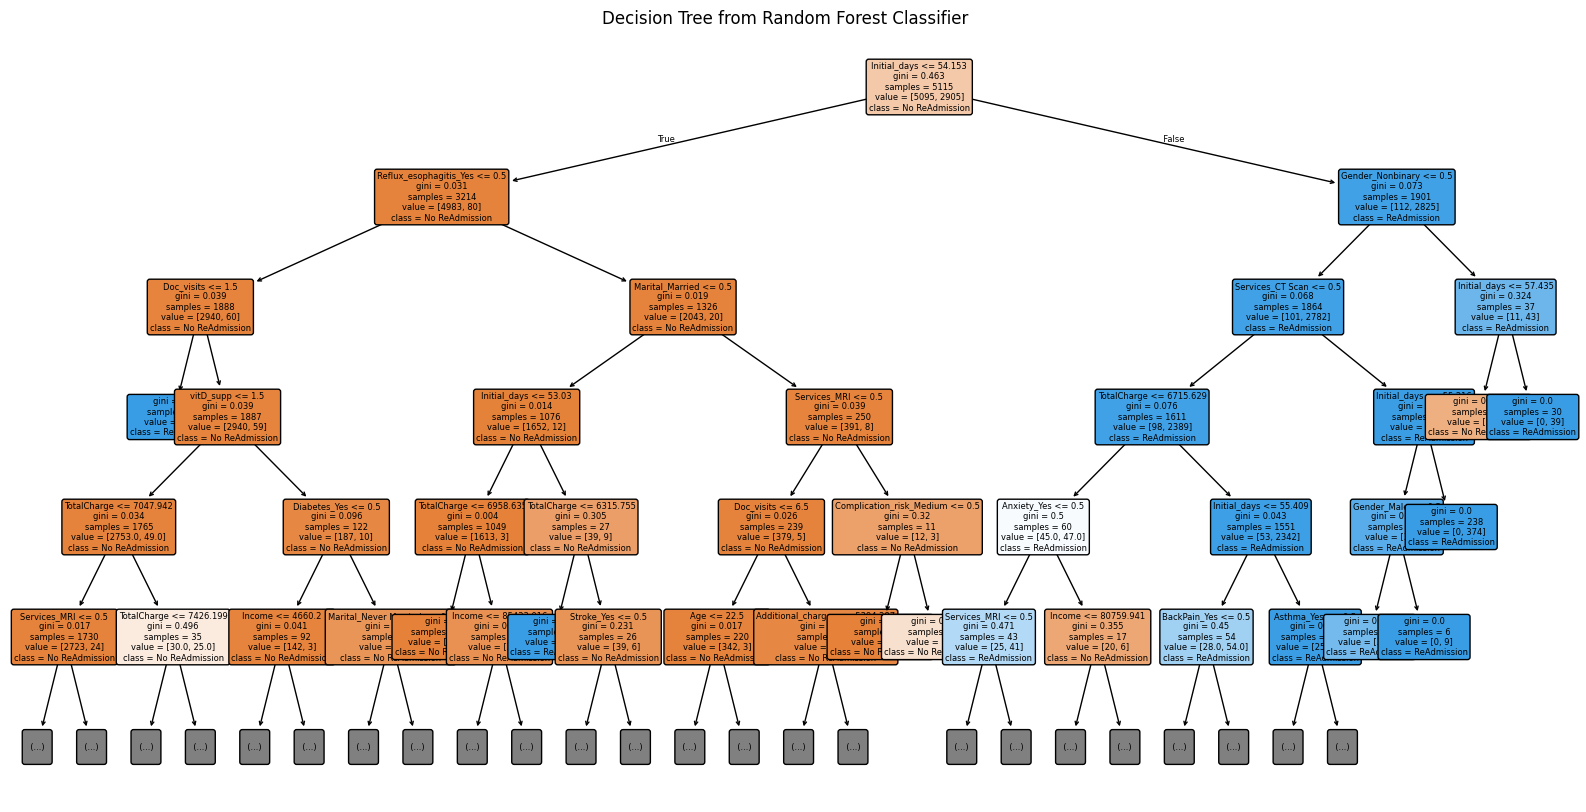

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree = rf_bestparams.estimators_[0]

plt.figure(figsize=(20,10))


plot_tree(tree,
            feature_names=train_data.drop('ReAdmis_Yes', axis=1).columns,
            class_names=['No ReAdmission', 'ReAdmission'],
            filled=True,
            rounded=True,
            fontsize=6,
            max_depth=5) # Limit depth for better visualization)
plt.savefig('../outputs/figures/random_forest_tree.png')
plt.title("Decision Tree from Random Forest Classifier")
plt.show()



In [8]:
from sklearn.metrics import classification_report,  confusion_matrix

In [9]:
target_names = ['No Readmission', 'Readmission']
report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", report)



Classification Report:
                 precision    recall  f1-score   support

No Readmission       0.98      0.99      0.98      1266
   Readmission       0.98      0.97      0.97       734

      accuracy                           0.98      2000
     macro avg       0.98      0.98      0.98      2000
  weighted avg       0.98      0.98      0.98      2000



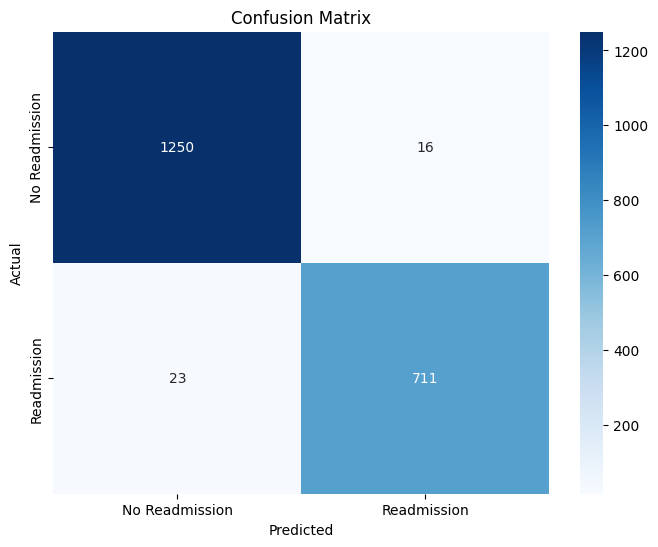

In [10]:
Confusion_Matrix = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
sns.heatmap(Confusion_Matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names) 
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.savefig('../outputs/figures/random_forest_confusion_matrix.png')
plt.show()\



C:\Users\nmart\AppData\Local\Temp\ipykernel_18596\2409371461.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df[:10], palette='viridis')


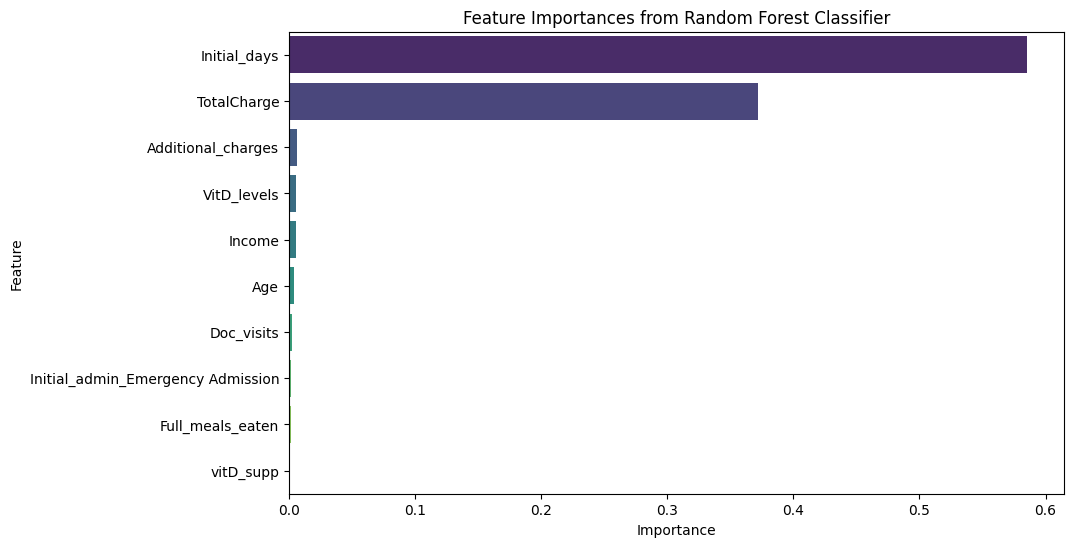

In [17]:
feature_importances = rf_bestparams.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df[:10], palette='viridis')

plt.savefig('../outputs/figures/random_forest_feature_importances.png')
plt.title('Feature Importances from Random Forest Classifier')
plt.show()



In [12]:
importance_df

,Feature,Importance
6,Initial_days,0.585295
7,TotalCharge,0.371946
8,Additional_charges,0.006376
2,VitD_levels,0.005509
1,Income,0.005494
0,Age,0.004165
3,Doc_visits,0.002159
18,Initial_admin_Emergency Admission,0.001574
4,Full_meals_eaten,0.001353
5,vitD_supp,0.001249


In [13]:
# saving the model for production 

import pickle 
with open('../outputs/models/random_forest_admissions_model.pkl', 'wb') as f:
    pickle.dump(rf_bestparams, f)


In [14]:
# adding precision, recall, F1-score, AUC-ROC metrics

#precision
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, rf_bestparams.predict_proba(X_test)[:, 1])

#explanation of metrics 
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Precision: The ratio of correctly predicted positive observations to the total predicted positives. It indicates how many of the predicted readmissions were actually readmissions.
# Recall: The ratio of correctly predicted positive observations to all actual positives. It shows how many actual readmissions were captured by the model.
# F1-Score: The weighted average of Precision and Recall. It is useful when you
# need to balance both Precision and Recall, especially in cases of class imbalance.
# AUC-ROC: Area Under the Receiver Operating Characteristic Curve. It measures the model's ability to distinguish between classes. A higher AUC indicates better performance.


Precision: 0.9780
Recall: 0.9687
F1-Score: 0.9733
AUC-ROC: 0.9986


In [15]:
# log and display cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)
print("Cross-Validation Results:\n", cv_results)

# the cross-validation results include metrics such as mean test scores, fit times,
# and parameter settings for each fold of the cross-validation process. 
# This information helps in understanding how different hyperparameter combinations performed 
# during the training phase and aids in selecting the best model configuration.

Cross-Validation Results:
      mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.132810      0.047090         0.005985        0.001721   
1         0.186628      0.022071         0.007125        0.001832   
2         0.272702      0.010795         0.008486        0.000941   
3         0.093975      0.010781         0.004718        0.000620   
4         0.186536      0.012761         0.006704        0.000703   
..             ...           ...              ...             ...   
103       0.091049      0.005981         0.003320        0.000077   
104       0.133647      0.006514         0.004258        0.000180   
105       0.044656      0.000723         0.002422        0.000103   
106       0.087083      0.002764         0.003308        0.000129   
107       0.130658      0.002225         0.004133        0.000040   

    param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0              None                       1                        2   
